<a href="https://colab.research.google.com/github/MengChiehLiu/2023-NTU-ACCT-ML-camp/blob/main/codes_for_student/Supervised_learning_ipynb_%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 NTU ML Camp: Supervised Learning
2023/2/8  
Meng-Chieh Liu

## Introduction

### What is Supervised Learning?
Supervised learning is a method of learning a predictive model from labeled data that can be used to make predictions on new, unknown data.

### Classification and Regression
Classification problems classify data into known categories, while regression problems predict continuous values from data.

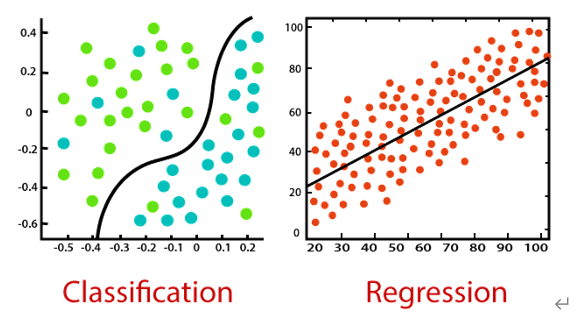

Image source: https://www.javatpoint.com/regression-vs-classification-in-machine-learning

## 1. Linear regression

### Intro

* In statistics, Ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model (with fixed level-one effects of a linear function of a set of explanatory variables) by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable.


* Simple conclusion: We want to minimize the **squared** distance between observed value and predicted value using a liner function.

Y = B_0 + B_1 * X_1 + … + B_k * X_1

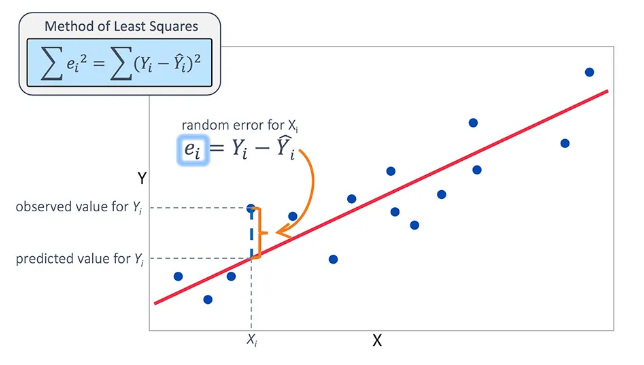

### 1. sklearn

* We will use the diabetes dataset from sklearn to practice create ols regression model in python.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [ ]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression(fit_intercept=True) # add constant
reg_model.fit(X, y) # X first

LinearRegression()

In [ ]:
# predicted result
reg_model.predict(X)[:10]

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893])

In [ ]:
print("R squared:", reg_model.score(X, y))
print('')
print("Model intercept:", reg_model.intercept_)
print("Model coeffifients:")
for col, coef in zip(X.columns, reg_model.coef_):
  print(f'   {col}: {coef}')

R squared: 0.5177494254132934

Model intercept: 152.1334841628965
Model coeffifients:
   age: -10.01219781747065
   sex: -239.81908936565608
   bmi: 519.8397867901341
   bp: 324.3904276893763
   s1: -792.1841616283054
   s2: 476.74583782366267
   s3: 101.04457032134462
   s4: 177.06417623225033
   s5: 751.2793210873947
   s6: 67.62538639104375


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = reg_model.predict(X)
MSE = mean_squared_error(y, y_pred)  # y_true, y_pred
print("Mean Square Error:", MSE)

Mean Square Error: 2859.6903987680657


### 2. statsmodel (Recommend)

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)   # add_constant_variables
reg_2 = sm.OLS(y, X).fit()   # y first

In [ ]:
results = reg_2.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.83e-62
Time:                        12:12:45   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* If we want, we can fit the ols summary into dataframe, it can be useful when we are doing feature selection.

In [ ]:
results_as_html = results.tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0].drop("const", axis=0)
results_df

,coef,std err,t,P>|t|,[0.025,0.975]
age,-10.0122,59.749,-0.168,0.867,-127.448,107.424
sex,-239.8191,61.222,-3.917,0.000,-360.151,-119.488
bmi,519.8398,66.534,7.813,0.000,389.069,650.610
bp,324.3904,65.422,4.958,0.000,195.805,452.976
s1,-792.1842,416.684,-1.901,0.058,-1611.169,26.801
s2,476.7458,339.035,1.406,0.160,-189.621,1143.113
s3,101.0446,212.533,0.475,0.635,-316.685,518.774
s4,177.0642,161.476,1.097,0.273,-140.313,494.442
s5,751.2793,171.902,4.370,0.000,413.409,1089.150
s6,67.6254,65.984,1.025,0.306,-62.065,197.316


In [ ]:
# predicted y
pred_y = reg_2.fittedvalues
pred_y

0      206.117070
1       68.072348
2      176.884060
3      166.917966
4      128.459842
          ...    
437    193.018028
438    101.051699
439    121.225055
440    211.858895
441     53.448190
Length: 442, dtype: float64

### 3. Statistics Review

#### Simple Linear Regression

In [ ]:
BMI = X[['const', 'bmi']]
bmi = BMI['bmi']
bmi_model = sm.OLS(y, BMI).fit()
bmi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.47e-42
Time:                        12:12:45   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R squared

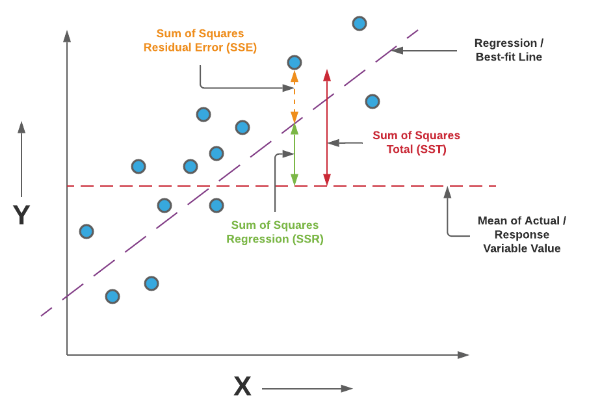

In [ ]:
mean_y = np.mean(y)
SSE = sum((bmi_model.fittedvalues-y)**2) #MSE
SST = sum((y-mean_y)**2)
SSR = sum((bmi_model.fittedvalues-mean_y)**2)
print(f'R-squared: {SSE/SST}')
print(f'R-squared: {SSR/SST}')

R-squared: 0.6560762397746198
R-squared: 0.3439237602253808


#### Estimated & Predicted Response

Confidence Interval : the average y under certain x  
Prediction Interval : y under certain x

In [ ]:
bmi_model.get_prediction().summary_frame().head(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,210.710038,4.870111,201.138468,220.281608,87.472423,333.947654
1,103.262195,4.381424,94.651076,111.873315,-19.904546,226.428937
2,194.337033,4.069900,186.338175,202.335892,71.211583,317.462484


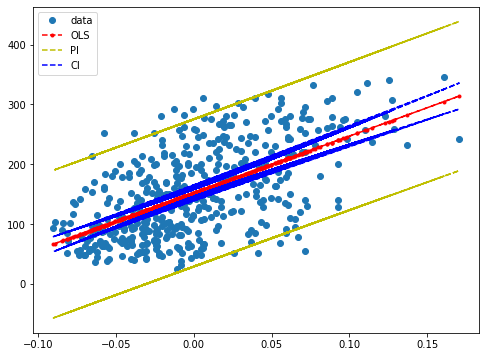

In [ ]:
import matplotlib.pyplot as plt

pred_ols = bmi_model.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
ci_l = pred_ols.summary_frame()["mean_ci_lower"]
ci_u = pred_ols.summary_frame()["mean_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(bmi, y, "o", label="data")
ax.plot(bmi, bmi_model.fittedvalues, "r--.", label="OLS")
ax.plot(bmi, iv_u, "y--", label="PI")
ax.plot(bmi, iv_l, "y--")
ax.plot(bmi, ci_u, "b--", label="CI")
ax.plot(bmi, ci_l, "b--")
ax.legend(loc="best")
plt.show()

#### Basis Assumptions

The error term needs to satisfy three assumptions:

(1) Normality: If the parent data exhibits a normal distribution, the error term will also exhibit the same distribution. It can be checked by normal probability plot or Shapiro-Wilk normality test.

(2) Independence: The error items should be independent of each other, otherwise, the test power of statistics will be reduced when estimating regression parameters. We can check by Durbin-Watson test.

(3) Homogeneity: If the variables are not equal, the independent variables cannot be effectively estimated by the dependent variables. We can check with the Residual Plot.

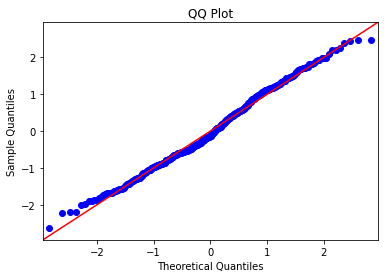

In [ ]:
# Check Normality
sm.qqplot(bmi_model.resid, line='45', fit=True) 
plt.title('QQ Plot')
plt.show()

In [ ]:
# Check Independence
from statsmodels.stats.stattools import durbin_watson
durbin_watson(bmi_model.resid)

1.8481670238115966

Durbin Watson test is used to detect the presence of autocorrelation in the residuals of a regression. 

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:

A test statistic of 2 indicates no serial correlation.  
The closer the test statistics is to 0, the more evidence of positive serial correlation.  
The closer the test statistics is to 4, the more evidence of negative serial correlation.

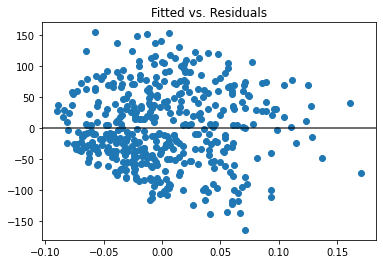

In [ ]:
# Check Constant Variance
plt.scatter(bmi, bmi_model.resid)
plt.axhline(y=0, c='black', alpha=.75)
plt.title('Fitted vs. Residuals')
plt.show()

## 2. Logistic Regression

### Intro

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

* Logit Transformation  
odds = pi/(1-pi)  
ln(odds) = B_0 + B_1 * X_1 + … + B_k * X_1  

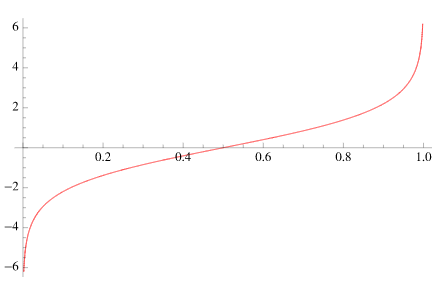

* Inverse transformation (Logistic transformation)  
ln(odds) = z  
pi = 1/(1+ exp(-z)) ==> Sigmoid function!

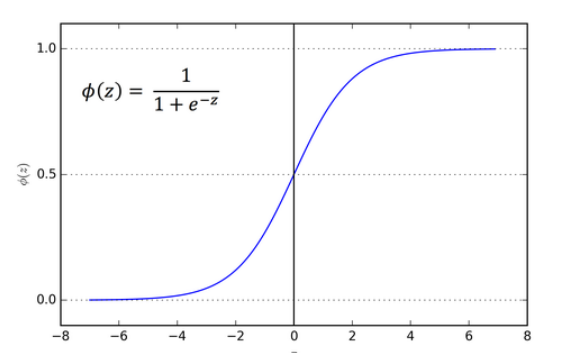

* In OLS, we want to minimize MSE, in logistic model, we want to maximize "Log Likelihood"

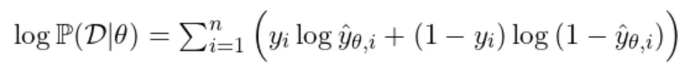

* However when we put logistic model in ML, it becomes a little bit different, because we usually minimize 'loss' in ML, so we simply makes it become "negative log likelihood", and it was exactly 'cross entropy' looks like, it is a very common loss function in neural network, so we can use "gradient descent" to approcach local minimun.

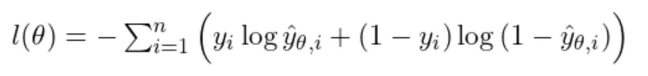

* Note that in pytorch, "negative log likelihood" and "cross entropy" are two different loss function, the "cross entropy" in pytorch is the combination of "softmax" and "negative log likelihood". It not really that important but just let you know. 

more detail:  
https://www.ibm.com/topics/logistic-regression  
https://ithelp.ithome.com.tw/articles/10269006  
https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81

### sklearn

We use breast_cancer dataset from sklearn to practive logistic regression

In [ ]:
from sklearn import datasets
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=666)
clf.fit(X, y)

LogisticRegression(max_iter=10000, random_state=666)

In [ ]:
y_pred = clf.predict(X)
# y_pred

### model evaluation

#### confusion matrix

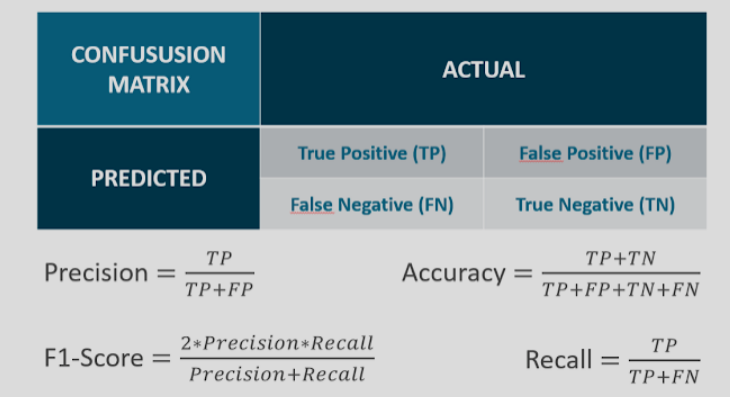

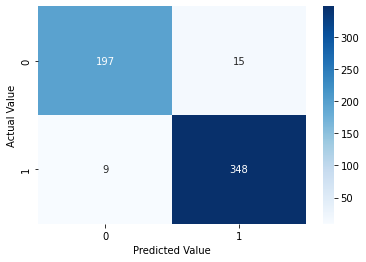

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y, y_pred)
ax = sns.heatmap(matrix, annot=True, fmt='0', cmap='Blues')
ax.set(ylabel='Actual Value', xlabel='Predicted Value')
plt.show()

In [ ]:
TP = matrix[1][1]
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2*precision*recall/(precision+recall)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.9578207381370826
precision: 0.9586776859504132
recall: 0.9747899159663865
f1: 0.9666666666666667


In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
f1_score(y, y_pred)

0.9666666666666667

In [ ]:
from sklearn.metrics import classification_report
metrics = classification_report(y, y_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



#### ROC curve

* ROC(Receiver operator characteristic）
* AUC(Area Under the Curve)
* TPR = TP/(TP+FN)
* FPR = FP/(FP+TN)

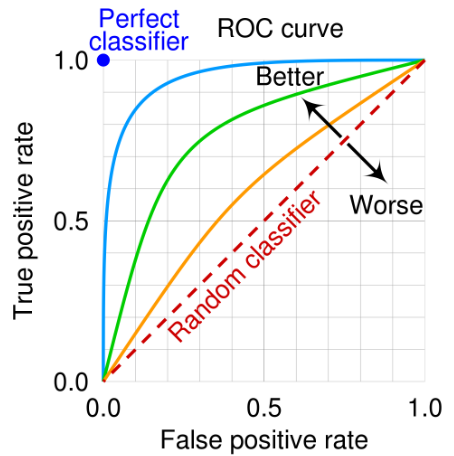

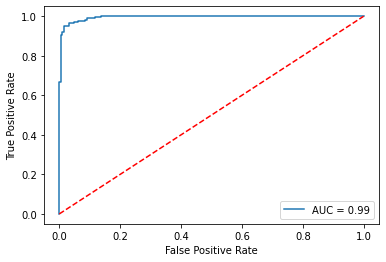

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
probs = clf.predict_proba(X)[:,1] # probability estimates
fpr, tpr, thresholds = roc_curve(y, probs) # y_true, y_pred
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot([0, 1], [0, 1],'r--')
plt.show()

## 3. Decision Tree

### Intro

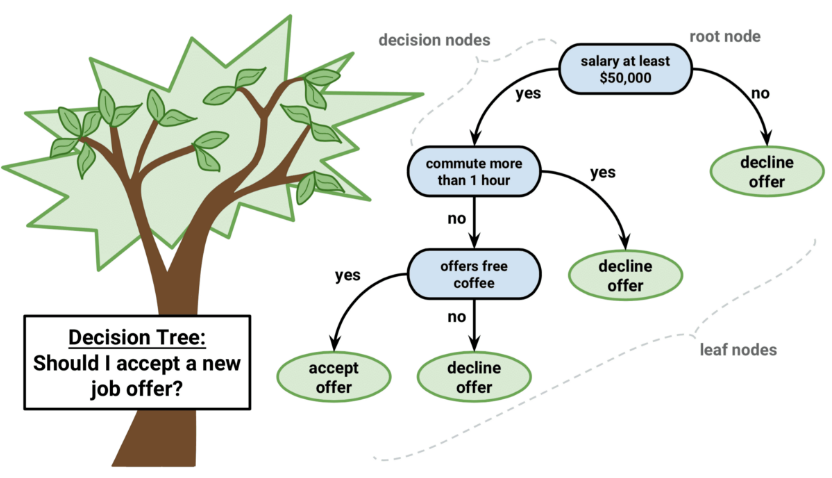

source: https://regenerativetoday.com/simple-explanation-on-how-decision-tree-algorithm-makes-decisions/

Three are several types of decesion trees, each kind using diffrent algorithm to generate the tree. Most common types are:

* ID3 --> using information gain
* C4.5 --> using gain ratio
* CART --> using gini impurity

CART( Classification And Regression Tree) is a  variation of the decision tree algorithm. It can handle both classification and regression tasks.  
In the decision tree, nodes are split into sub-nodes on the basis of a threshold value of an attribute. The root node is taken as the training set and is split into two by considering the best attribute and threshold value. Further, the subsets are also split using the same logic. This continues till the last pure sub-set is found in the tree or the maximum number of leaves possible in that growing tree.

* Advantages of CART
1. Results are simplistic.
2. Classification and regression trees are Nonparametric and Nonlinear.
3. Classification and regression trees implicitly perform feature selection.
4. Outliers have no meaningful effect on CART.


* Limitations of CART
1. Overfitting.
2. High Variance.
3. Low bias. 

### EDA (Exploratory Data Analysis)

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).map(lambda x: iris.target_names[x])

In [ ]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X.corr().style.background_gradient(cmap='coolwarm', axis=None).format("{:.2}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.0,-0.12,0.87,0.82
sepal width (cm),-0.12,1.0,-0.43,-0.37
petal length (cm),0.87,-0.43,1.0,0.96
petal width (cm),0.82,-0.37,0.96,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

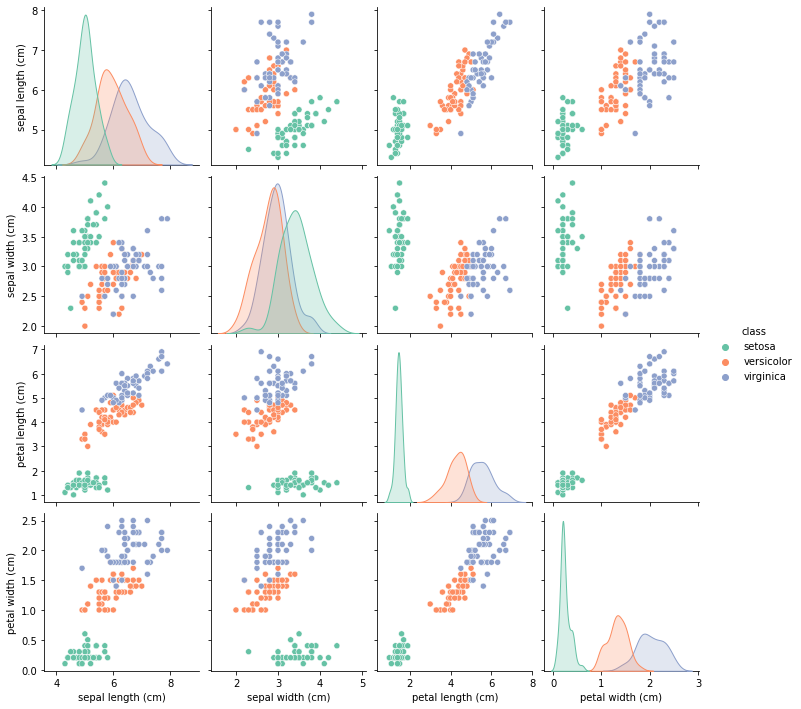

In [ ]:
data = X.copy()
data['class'] = y
sns.pairplot(data, hue='class', diag_kind = "kde", kind = "scatter", palette = "Set2")
plt.show()

### sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, plot_tree

clf = DecisionTreeClassifier(random_state=666, max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=666)

In [ ]:
r = export_text(clf)
print(r)

|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



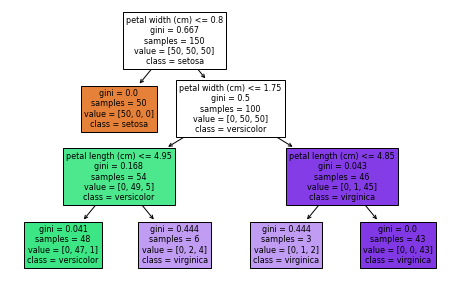

In [ ]:
fig = plt.figure(figsize=(8,5))
plot_tree(clf,
    feature_names=iris.feature_names,  
    class_names=iris.target_names, 
    filled=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X)
metrics = classification_report(y, y_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Overfitting and Underfitting

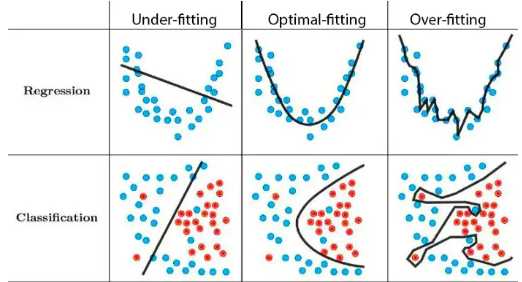

In [ ]:
forest = datasets.fetch_covtype()
forest.data.shape

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(forest.data, forest.target, test_size=0.3, random_state=666)

#### Training only on train data

In [ ]:
clf = DecisionTreeClassifier(random_state=666)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
metrics = classification_report(y_train, y_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    148291
           2       1.00      1.00      1.00    198085
           3       1.00      1.00      1.00     25063
           4       1.00      1.00      1.00      1951
           5       1.00      1.00      1.00      6680
           6       1.00      1.00      1.00     12277
           7       1.00      1.00      1.00     14361

    accuracy                           1.00    406708
   macro avg       1.00      1.00      1.00    406708
weighted avg       1.00      1.00      1.00    406708



#### Testing on test data

In [ ]:
y_test_pred = clf.predict(X_test)
metrics = classification_report(y_test, y_test_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

           1       0.93      0.94      0.93     63549
           2       0.95      0.95      0.95     85216
           3       0.93      0.93      0.93     10691
           4       0.81      0.87      0.84       796
           5       0.83      0.80      0.82      2813
           6       0.88      0.87      0.87      5090
           7       0.94      0.94      0.94      6149

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



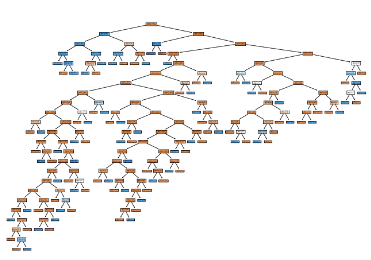

In [ ]:
r = export_text(clf)
print(r)

|--- feature_0 <= 3044.50
|   |--- feature_0 <= 2510.50
|   |   |--- feature_3 <= 15.00
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_0 <= 2339.50
|   |   |   |   |   |--- feature_6 <= 194.50
|   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 543.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 1923.50
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_0 >  1923.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 172.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  172.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 195.00
|   |   |   |   |   |   |   |   |   |   |   |--- clas

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=666, n_estimators=100) # how many trees you wanna generate
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=666)

In [ ]:
y_train_pred = clf.predict(X_train)
metrics = classification_report(y_train, y_train_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    148291
           2       1.00      1.00      1.00    198085
           3       1.00      1.00      1.00     25063
           4       1.00      1.00      1.00      1951
           5       1.00      1.00      1.00      6680
           6       1.00      1.00      1.00     12277
           7       1.00      1.00      1.00     14361

    accuracy                           1.00    406708
   macro avg       1.00      1.00      1.00    406708
weighted avg       1.00      1.00      1.00    406708



In [ ]:
y_test_pred = clf.predict(X_test)
metrics = classification_report(y_test, y_test_pred)  # y_true, y_pred
print(metrics)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63549
           2       0.95      0.97      0.96     85216
           3       0.94      0.96      0.95     10691
           4       0.90      0.87      0.88       796
           5       0.94      0.76      0.84      2813
           6       0.93      0.90      0.92      5090
           7       0.98      0.94      0.96      6149

    accuracy                           0.95    174304
   macro avg       0.94      0.91      0.92    174304
weighted avg       0.95      0.95      0.95    174304

